In [413]:
import pandas as pd

def ler_csv(caminho_arquivo):
    return pd.read_csv(caminho_arquivo, sep=',',usecols=[0,1], decimal=',', header=0)

df = ler_csv('dados/ibovespa.csv')

In [414]:
df.rename(columns={'Data':'data','Último': 'y'}, inplace=True)
df['data'] = pd.to_datetime(df['data'], format='%d.%m.%Y')
df['ds'] = df['data']
df.set_index('data', inplace=True)
df = df.resample('W').mean()
df.sort_index(ascending=True, inplace=True)
df['y'] = df['y'].astype('float64')
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

In [418]:
df = df[df['ds'] >= '01-01-2016']

In [421]:
#train test split
#to_row = int(len(df) *0.8)
to_row = len(df)-40
df_treino = df[0:to_row]
df_teste = df[to_row:]

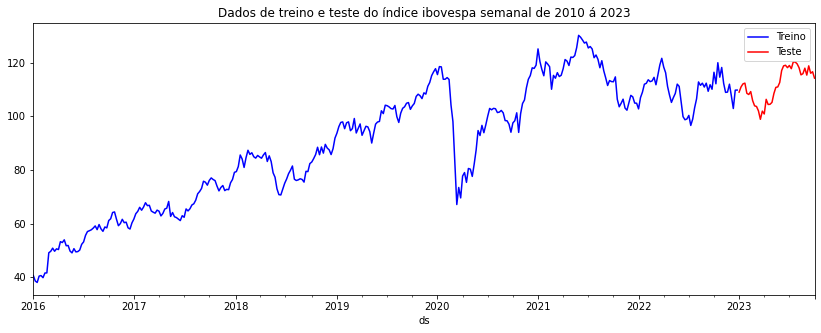

In [422]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
df_treino.plot(kind='line', x='ds', y='y', color='blue', label='Treino', ax=ax)
df_teste.plot(kind='line', x='ds', y='y', color='red', label='Teste', ax=ax)
plt.title('Dados de treino e teste do índice ibovespa semanal de 2010 á 2023')
plt.show()

In [423]:
# Erro quadrático médio
from sklearn.metrics import mean_squared_error
from math import sqrt
def measure_rmse(atual, previsto):
    return sqrt(mean_squared_error(atual, previsto))

# Modelo simples

In [424]:
model =Prophet()
model.fit(df_treino)

In [425]:
future = model.make_future_dataframe(periods=len(df_teste), freq='W', include_history = False)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-01,113.244531,103.196731,122.604507
1,2023-01-08,113.845926,104.068954,123.157821
2,2023-01-15,113.999723,104.758860,123.710031
3,2023-01-22,113.985693,103.929078,124.112561
4,2023-01-29,114.093251,103.960519,124.761735
5,2023-02-05,114.261091,104.855337,124.604551
6,2023-02-12,114.117515,103.953498,124.063246
7,2023-02-19,113.337572,103.404593,122.715386
8,2023-02-26,111.935907,102.010247,121.565171
9,2023-03-05,110.262010,100.404936,120.195662


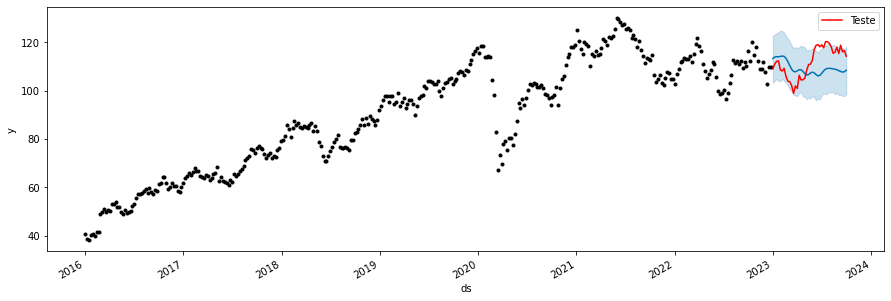

In [427]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast,ax=ax)
df_teste.plot(kind='line', x='ds', y='y', color='red', label='Teste', ax=ax)
plt.show()

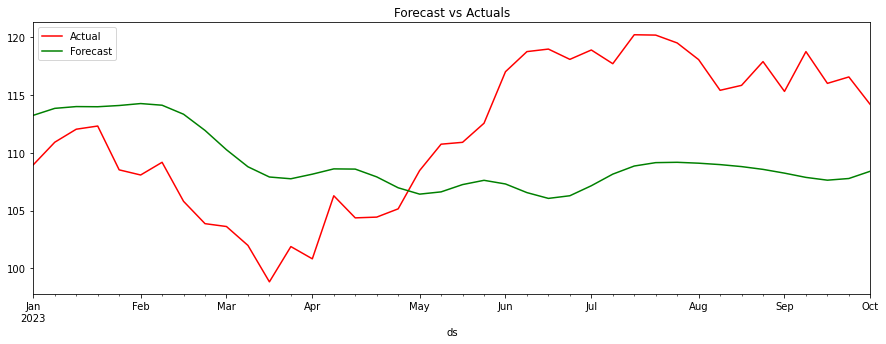

In [428]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
df_teste.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [430]:
measure_rmse(df_teste['y'], forecast['yhat'])

7.668662900326096

In [411]:
import pandas as pd

# Crie um DataFrame vazio para armazenar as previsões
predictions = pd.DataFrame()
history = df_treino.copy()
steps=1

# Loop sobre o DataFrame em incrementos de 'steps'
for i in range(0, len(df_teste)):
    # Ajuste o modelo aos dados até o passo atual
    model = Prophet()
    model.fit(history)

    # Crie um DataFrame para a data futura para a qual você deseja fazer uma previsão
    future = model.make_future_dataframe(periods=steps,freq='W',include_history = False)

    # Use o modelo para fazer a previsão
    forecast = model.predict(future)

    # Adicione a linha de previsão ao DataFrame de previsões
    predictions = pd.concat([predictions, forecast[['ds', 'yhat']]], axis=0)
    linha = df_teste.iloc[i].to_frame().T
    history = pd.concat([history, linha], axis=0)

In [410]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2021-01-03,110.428957


In [281]:
df_test

,y,ds
data,,
2022-05-22,111.942,2022-05-22
2022-05-29,111.102,2022-05-29
2022-06-05,105.481,2022-06-05
2022-06-12,99.825,2022-06-12
2022-06-19,98.672,2022-06-19
...,...,...
2023-09-03,115.313,2023-09-03
2023-09-10,118.758,2023-09-10
2023-09-17,116.009,2023-09-17


In [312]:
predictions.index = df_test.index

In [313]:
predictions.drop('ds', axis=1,inplace=True)
df_test.drop('ds', axis=1,inplace=True)

C:\Users\alex\AppData\Local\Temp\ipykernel_20788\4084212120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('ds', axis=1,inplace=True)


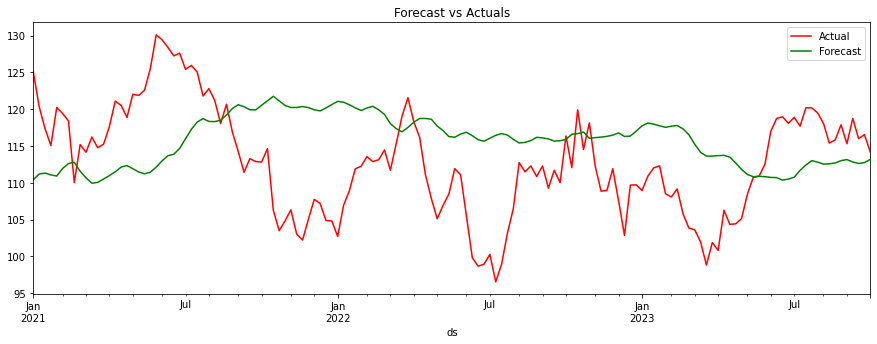

In [412]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
df_teste.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
predictions.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [331]:
import holidays
from datetime import datetime

data_final = datetime.strptime('2023-10-01', '%Y-%m-%d').date()

holiday = pd.DataFrame([])
for date, name in sorted(holidays.Brazil(years=range(2010,2024)).items()):
    if date <= data_final:
        df_temp = pd.DataFrame({'ds': date, 'holiday': "BR-Holidays"}, index=[0])
        holiday = pd.concat([holiday, df_temp], ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')


In [332]:
holiday

,ds,holiday
0,2010-01-01,BR-Holidays
1,2010-04-02,BR-Holidays
2,2010-04-21,BR-Holidays
3,2010-05-01,BR-Holidays
4,2010-09-07,BR-Holidays
...,...,...
117,2023-01-01,BR-Holidays
118,2023-04-07,BR-Holidays
119,2023-04-21,BR-Holidays
120,2023-05-01,BR-Holidays


In [333]:
model_with_holidays = Prophet(holidays=holiday)
model_with_holidays.fit(df_train)
future = model_with_holidays.make_future_dataframe(periods=len(df_test), freq='W')
forecast = model_with_holidays.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
711,2023-08-20,126.493347,118.349223,134.771551
712,2023-08-27,126.988787,118.805817,135.288299
713,2023-09-03,127.265170,118.900494,136.319247
714,2023-09-10,127.199608,118.559787,136.237409
715,2023-09-17,127.027263,118.167419,135.463684
716,2023-09-24,127.099638,118.310219,136.634603
717,2023-10-01,127.549241,119.133393,136.389078


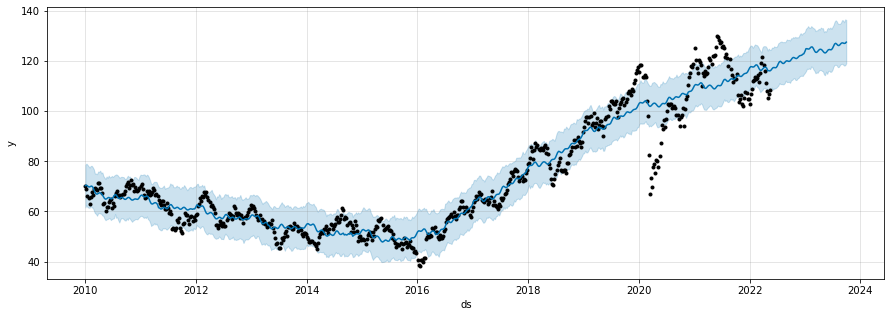

In [334]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_with_holidays.plot(forecast,ax=ax)
plt.show()

In [369]:
X_tst_forecast_holiday = model_with_holidays.predict(df_test)
X_tst_forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-03,110.265026,101.832818,118.997130
1,2021-01-10,110.624261,102.448042,119.274110
2,2021-01-17,110.542655,102.007636,118.333993
3,2021-01-24,110.404995,101.918087,118.537092
4,2021-01-31,110.582165,102.556236,119.478493
...,...,...,...,...
139,2023-09-03,127.265170,119.510921,135.965181
140,2023-09-10,127.199608,118.983887,136.107019
141,2023-09-17,127.027263,118.977338,135.901947
142,2023-09-24,127.099638,118.343928,135.928227


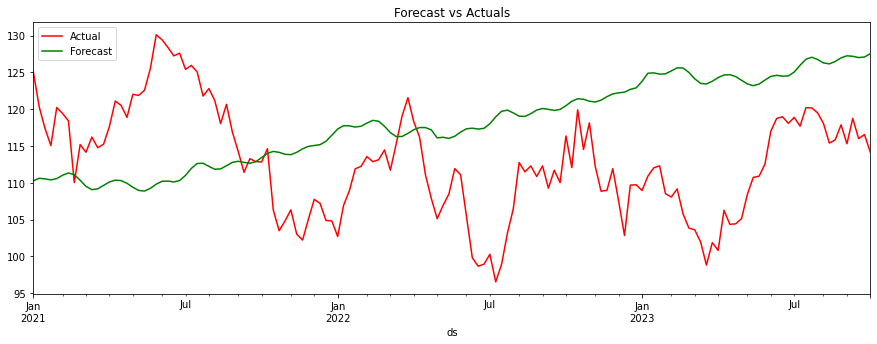

In [379]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
df_teste.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_forecast_holiday.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [380]:
measure_rmse(df_teste['y'], X_tst_forecast_holiday['yhat'])

11.845937595840036

In [381]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [385]:
import random
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holiday, 
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='BR')
    train_model.fit(df_treino)
    train_forecast = train_model.make_future_dataframe(periods=len(df_teste), freq='W',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    RMSE = measure_rmse(df_teste['y'], abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',RMSE)
    model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 11.231329222256845


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 12.731657459778914
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.251994908816695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.702340275048154
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.252428977846412
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.765325483524833
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.256459893550902
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.710028119604734
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.162230544914955
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.75078227884346
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.071393451991264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.61536666415438
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.226346355088005
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.819050436203401
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.206739778494182
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.721569089426469
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.421151313135091
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.717490592396592
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.212390212896057
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.837118144058337
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.201722608461239
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.83823263511924
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.252974421228283
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.746199166128468
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.182042876041896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.796750676180892
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.296294453540014
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.743288665705764
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.307540045458808
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.747896766756428
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.609044043197683
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.012309715550161
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.657413749616785
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.891545916103373
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.50173204874352
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.008678761554478
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.643380707956812
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.896853299201885
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.702517488501595
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.879002580478241
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.502660781494278
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.940736356915702
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.413917957785529
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.9243586457873
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.56098444363173
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.07713302976659
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.574828167393106
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.98316596842911
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.513143435161677
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.00331345837404
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.494051099817332
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.972226679531381
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.473720580231392
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.902351083564154
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.583168811265022
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.906382112247915
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.488837219411158
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.88070108773403
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.630810777542782
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.857366561008634
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.804245870717342
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.517904089643633
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.83602818501122
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.673670140018874
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.736537257398387
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.652529485619748
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.805573083577142
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.54384594428358
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.852676581312709
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.672941456980418
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.806846418918196
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.65125484124696
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.818082599781961
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.543146775485273
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.722999809254096
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.664327423555871
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.728769990684395
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.68305655589898
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.903174450182025
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.522235152644761
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.865536629008403
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.666470516175053
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.745497768457852
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.578949502626452
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.83549156043063
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.55427293643938
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.753428951641958
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.667005711445535
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.76868058466564
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.635305150840262
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.977860220030745
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.521664116881121
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.057784227723163
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.596272272321272
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.94503616217525
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.615111996418658
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.091126113761469
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.453403275100314
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.897367552849326
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.54238262269868
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.006110536401845
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.6151419022352
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.919980771272844
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.507547554760723
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.17212618586786
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.54091469790455
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.896185714477177
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.607745199620902
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.019020424039251
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.540806862400732
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.186211011677319
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.61177162118817
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.050544922490772
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.598065856851134
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.256570863829522
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.505074754831849
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.04011155008251
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.501125264859
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.09682151299029
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.587403858609092
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.194769407885577
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.259611480715506
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.180577160810493
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.285854116880682
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.090749287506172
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.348494460691027
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.186060433764906
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.270783556993193
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.13169528780394
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.2294929769746
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.029104859100583
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.323599645344219
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.039924826476339
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.231014421684609
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.367157382068422
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.309834603674654
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.979488463931748
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.368466153877051
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.241180953516473
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.289317164566626
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.207937968434218
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.239692935437015
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.24746416977075
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.388436883468328
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.189640926089144
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.338303861299336
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.14908779058771
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.324753534549371
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 12.016540372911466
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


Mean Absolute Percentage Error(MAPE)------------------------------------ 11.32945632970175


C:\Users\alex\AppData\Local\Temp\ipykernel_20788\864709669.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)


In [386]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,11.071393,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
1,11.162231,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
2,11.182043,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
3,11.201723,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
4,11.20674,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."


In [393]:
registro = parameters.iloc[0, 1]
registro

{'changepoint_prior_scale': 0.1,
 'holidays_prior_scale': 0.2,
 'n_changepoints': 200,
 'seasonality_mode': 'multiplicative'}

In [391]:
# Crie um DataFrame vazio para armazenar as previsões
import random
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    predictions = pd.DataFrame()
    history = df_treino.copy()
    steps=1

    # Loop sobre o DataFrame em incrementos de 'steps'
    for i in range(0, len(df_teste)):
        # Ajuste o modelo aos dados até o passo atual
        model = Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                             holidays_prior_scale = p['holidays_prior_scale'],
                             n_changepoints = p['n_changepoints'],
                             seasonality_mode = p['seasonality_mode'],
                             weekly_seasonality=True,
                             daily_seasonality = True,
                             yearly_seasonality = True,
                             holidays=holiday, 
                             interval_width=0.95)
        model.add_country_holidays(country_name='BR')
        model.fit(history)

        # Crie um DataFrame para a data futura para a qual você deseja fazer uma previsão
        future = model.make_future_dataframe(periods=steps,freq='W')

        # Use o modelo para fazer a previsão
        forecast = model.predict(future)

        # Adicione a linha de previsão ao DataFrame de previsões
        predictions = pd.concat([predictions, forecast.iloc[-1:][['ds', 'yhat']]], axis=0)
        linha = df_test.iloc[i].to_frame().T
        history = pd.concat([history, linha], axis=0)
    test=predictions[['ds','yhat']]
    RMSE = measure_rmse(df_teste['y'], abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',RMSE)
    model_parameters = model_parameters.append({'MAPE':RMSE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


KeyboardInterrupt: 

In [396]:
predictions = pd.DataFrame()
history = df_treino.copy()
for i in range(0, len(df_teste)):
    # Ajuste o modelo aos dados até o passo atual
    model = Prophet(changepoint_prior_scale = 0.1,
                         holidays_prior_scale = 0.2,
                         n_changepoints = 200,
                         seasonality_mode = 'multiplicative',
                         weekly_seasonality=True,
                         daily_seasonality = False,
                         yearly_seasonality = False,
                         holidays=holiday, 
                         interval_width=0.95)
    model.add_country_holidays(country_name='BR')
    model.fit(history)

    # Crie um DataFrame para a data futura para a qual você deseja fazer uma previsão
    future = model.make_future_dataframe(periods=steps,freq='W')

    # Use o modelo para fazer a previsão
    forecast = model.predict(future)

    # Adicione a linha de previsão ao DataFrame de previsões
    predictions = pd.concat([predictions, forecast.iloc[-1:][['ds', 'yhat']]], axis=0)
    linha = df_test.iloc[i].to_frame().T
    history = pd.concat([history, linha], axis=0)

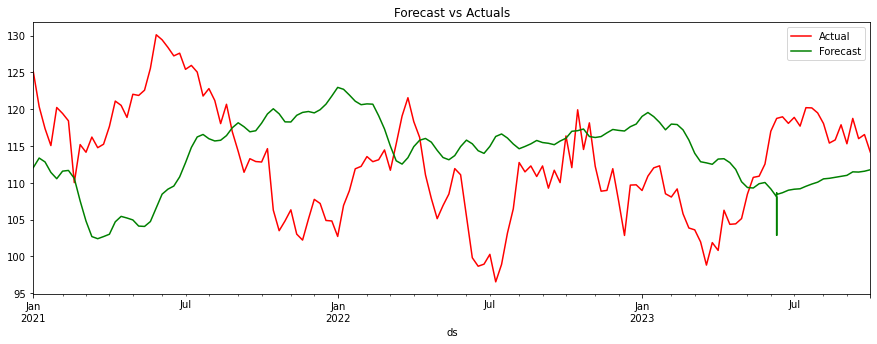

In [395]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
df_teste.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
predictions.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()